# ASSIGNMENT 2
### ALMANIK BALINGGA
### almanik.work@gmail.com

### Import Library

Untuk memulai analisis ini, pertama tama kita akan menyiapkan segala library yang diperlukan

In [19]:
from __future__ import print_function, division
import numpy as np
import scipy as sp
import statistics
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Setelah itu, kita load dataset yang akan kita gunakan, dalam hal ini dataset yang akan digunakan adlaah dataset penjualan properti di NewYork City.

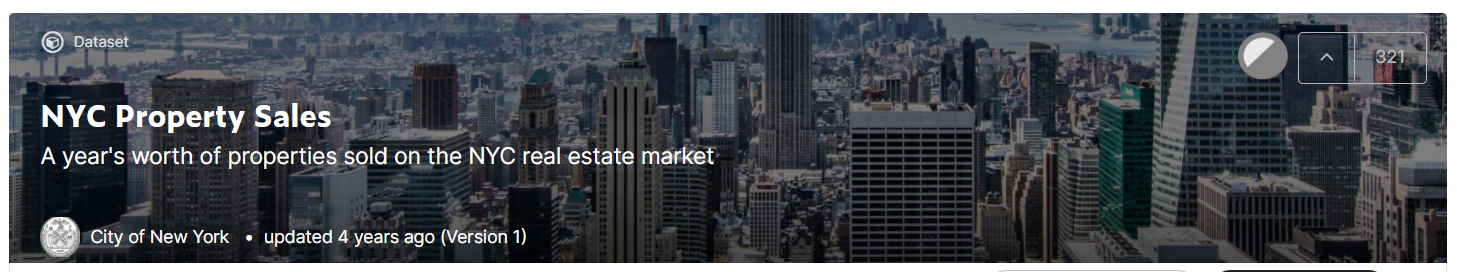

In [2]:
df = pd.read_csv('dataset/nyc-rolling-sales.csv')

### Informasi Umum Data

Untuk memastikan data sudah siap dengan sempurna, maka kita perlu untuk melihat sekilas data dengan command *.head()* dan *.tail()*

In [3]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [4]:
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Setelah itu kita cek kondisi data. Bisa dimulai dengan mengecek nilai null, kemudian mengecek nilai yang tidak valid

In [5]:
df.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Untuk emndapat gambaran singkat dari data, kita bisa menggunakan *.describe()* yang akan menampilkan statistik singkat dari data yang bersifat numerik

In [6]:
df.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


Kemudian kita drop kolom 'Unnamed: 0' karena tidak berarti apa apa bagi data.

In [7]:
df = df.drop('Unnamed: 0',axis=1)

In [8]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


1. Bagiamana gambaran Statistik Deskriptif dari tiap kolom jika dibagi berdasarkan Wilayah?
2. Daerah mana yang paling banyak penjulaannya?
3. Apakah bangunan lama atau bangunan baru yang lebih terjual?
4. Bagaimana Rata rata penjualan per properti? properti apakah yang paling mahal?
5. Bagaimana median harga di tiap daerah?
6. Bagaimana Standar Deviasi dan Variance nya?
7. Apakah luas rumah (Gross Square Feet) berdistribusi normal? 
8. Rata rata luas rumah (gross square feet) di NYC dengan CI di angka 95%

### Bagiamana gambaran Statistik Deskriptif dari tiap kolom?

#### BOROUGH

untuk menjawab pertanyaan tersebut, kita akan memulai dair kolom BOROUGH. <br> Pertama tama, kita akan melihat bagaimana persebaran jumlah tiap nilainya, yang mewakili nama nama daerah seperti 
1. Manhattan
2. Bronx
3. Brooklyn
4. Queens
5. Staten Island

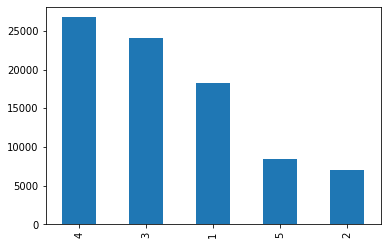

In [9]:
df['BOROUGH'].value_counts().plot(kind='bar')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "Borough" bersifat kategorikal.

In [10]:
print("Modus =",statistics.mode(df['BOROUGH']))

Modus = 4


Modus dari kolom "BOROUGH" adalah 4 yang berarti Queens adalah wilayah dengan transaksi penjualan properti terbanyak.

#### NEIGHBORHOOD

Untuk kolom NEIGHBORHOOD juga kita berikan treatmen yang sama yaitu melihat frekuensi tiap nilai datanya.

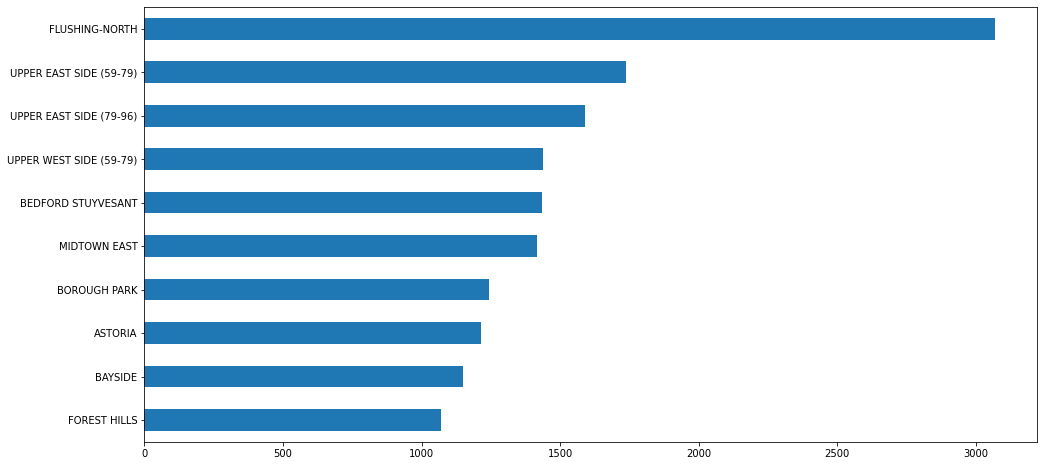

In [11]:
plt.figure(figsize=(16,8))
df['NEIGHBORHOOD'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "Neighborhood" bersifat kategorikal.

In [12]:
print("Modus dari kolom NEIGHBORHOOD adalah ",statistics.mode(df['NEIGHBORHOOD']))

Modus dari kolom NEIGHBORHOOD adalah  FLUSHING-NORTH


#### BUILDING CLASS CATEGORY

Building class category adalah kolom yang berisi jenis properti yang dijual, seperti hotel, rumah dan sebagainya.
Karena data ini bersifat kategorial, maka kita berikan treatmen sama seperti kolom kategorikal lainnya.

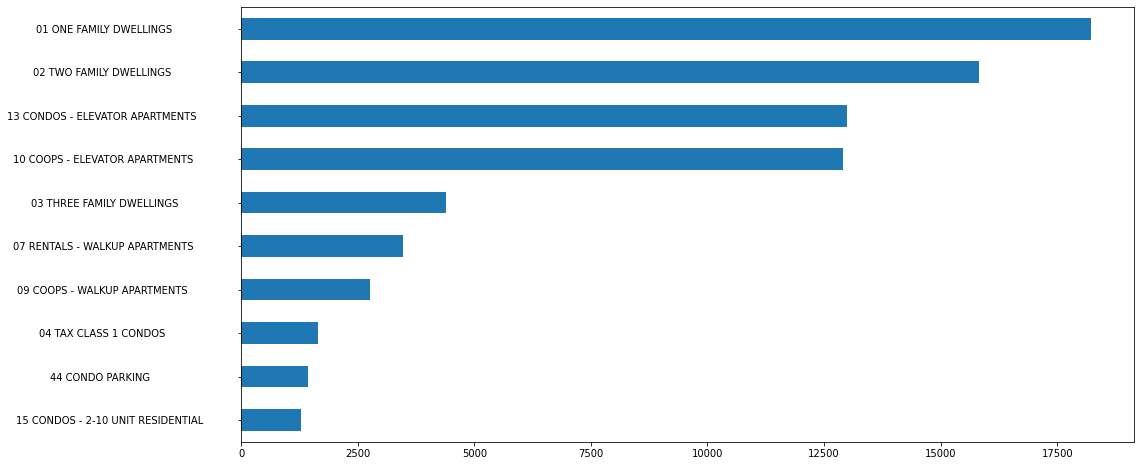

In [13]:
plt.figure(figsize=(16,8))
df['BUILDING CLASS CATEGORY'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "BUILDING CLASS CATEGORY" bersifat kategorikal.

In [14]:
print("Modus dari kolom BUILDING CLASS CATEGORY adalah",statistics.mode(df['BUILDING CLASS CATEGORY']))

Modus dari kolom BUILDING CLASS CATEGORY adalah 01 ONE FAMILY DWELLINGS                    


#### TAX CLASS AT PRESENT

Kolom ini merepresentasikan kelas pajak yang ditentukan untuk jenis properti saat ini. Data ini juga bersifat kategorikal sehingga kita akan mencoba melihat frekuensi kemunculan nilainya.

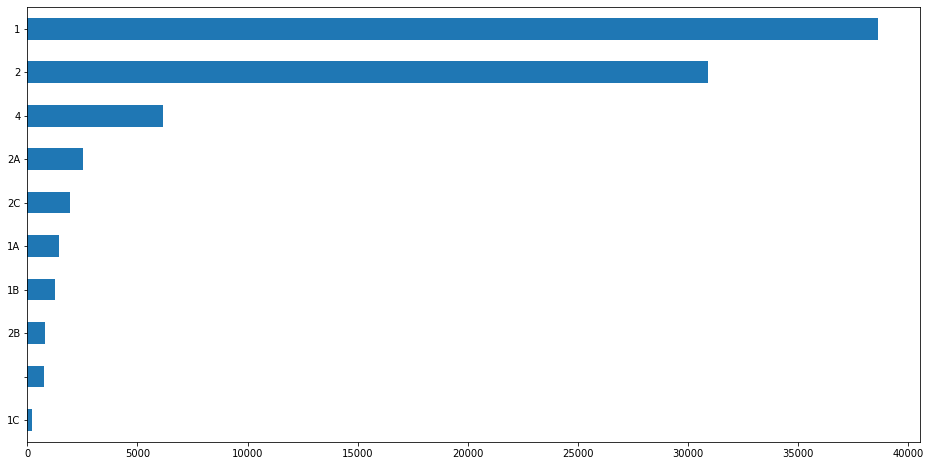

In [15]:
plt.figure(figsize=(16,8))
df['TAX CLASS AT PRESENT'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "AX CLASS AT PRESENT" bersifat kategorikal.

In [16]:
print("Modus dari kolom AX CLASS AT PRESENT adalah",statistics.mode(df['TAX CLASS AT PRESENT']))

Modus dari kolom AX CLASS AT PRESENT adalah 1


#### BLOCK

Untuk kolom block, karena bersifat numerik, maka kita akan mencoba mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

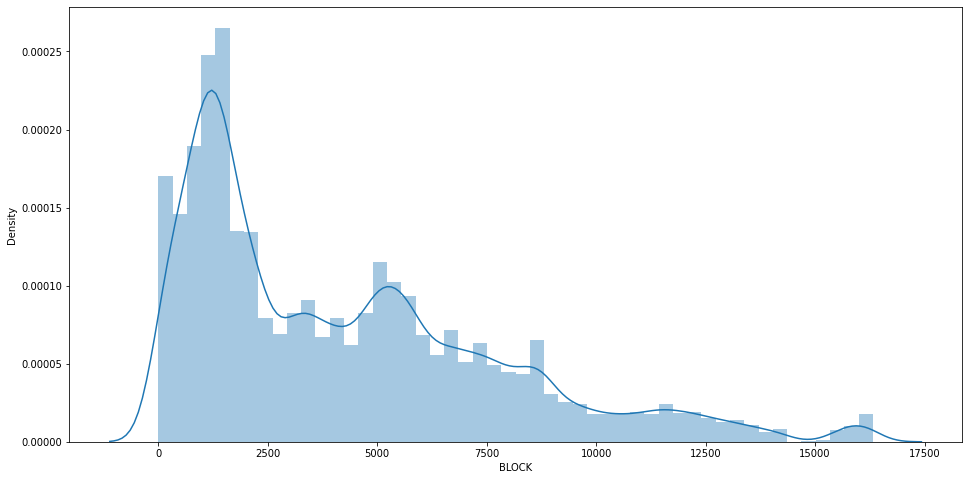

Rata Rata Dari BLOCK adalah : 4237.218976202867
Median dari BLOCK adalah : 3311.0
Standar Deviasi Dari BLOCK adalah : 3568.2423045709443
Variance Dari BLOCK adalah : 12732353.144129762
Modus Dari BLOCK adalah : 5066
Percentile 25,50, dan 75 Dari BLOCK adalah : [1322.75 3311.   6281.  ]


In [20]:
plt.figure(figsize=(16,8))
sns.distplot(df['BLOCK'])
plt.show()
print('Rata Rata Dari BLOCK adalah :',df['BLOCK'].mean())
print('Median dari BLOCK adalah :',df['BLOCK'].median())
print('Standar Deviasi Dari BLOCK adalah :',np.std(df['BLOCK']))
print('Variance Dari BLOCK adalah :',np.var(df['BLOCK']))
print('Modus Dari BLOCK adalah :',statistics.mode(df['BLOCK']))
print('Percentile 25,50, dan 75 Dari BLOCK adalah :',np.percentile(df['BLOCK'],[25,50,75]))

#### LOT

Untuk kolom LOT, karena bersifat numerik, maka kita akan mencoba mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

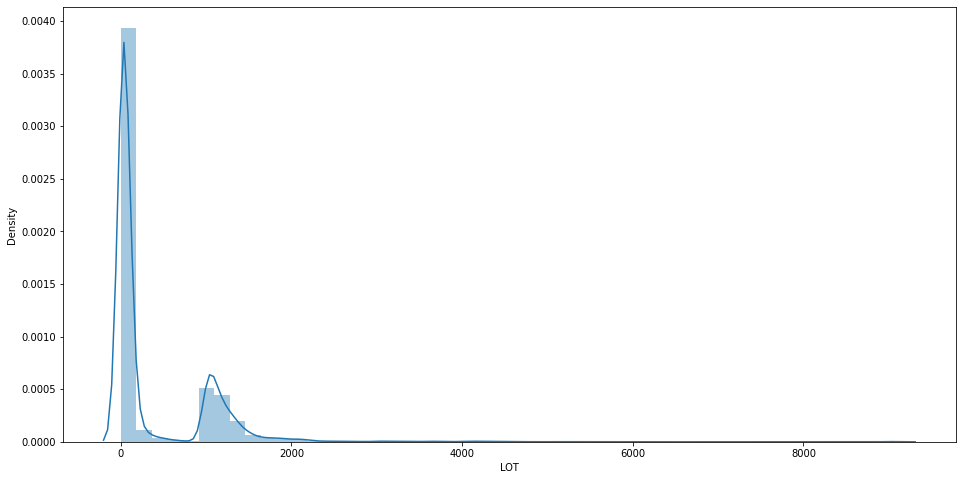

Rata Rata Dari LOT adalah : 376.22401476084593
Median dari LOT adalah : 50.0
Standar Deviasi Dari LOT adalah : 658.1329218982801
Variance Dari LOT adalah : 433138.9428863677
Modus Dari LOT adalah : 1
Percentile 25,50, dan 75 Dari LOT adalah : [  22.   50. 1001.]


In [21]:
plt.figure(figsize=(16,8))
sns.distplot(df['LOT'])
plt.show()
print('Rata Rata Dari LOT adalah :',df['LOT'].mean())
print('Median dari LOT adalah :',df['LOT'].median())
print('Standar Deviasi Dari LOT adalah :',np.std(df['LOT']))
print('Variance Dari LOT adalah :',np.var(df['LOT']))
print('Modus Dari LOT adalah :',statistics.mode(df['LOT']))
print('Percentile 25,50, dan 75 Dari LOT adalah :',np.percentile(df['LOT'],[25,50,75]))

#### EASE-MENT

In [22]:
df['EASE-MENT'].value_counts()

     84548
Name: EASE-MENT, dtype: int64

Karena kolom ini tidak memiliki nilai, maka kita drop saja.

In [23]:
df = df.drop('EASE-MENT',axis=1)

#### BUILDING CLASS AT PRESENT

Kolom ini merepresentasikan kelas bangunan yang dijual saat ini.Data ini juga bersifat kategorikal sehingga kita akan mencoba melihat frekuensi kemunculan nilainya.

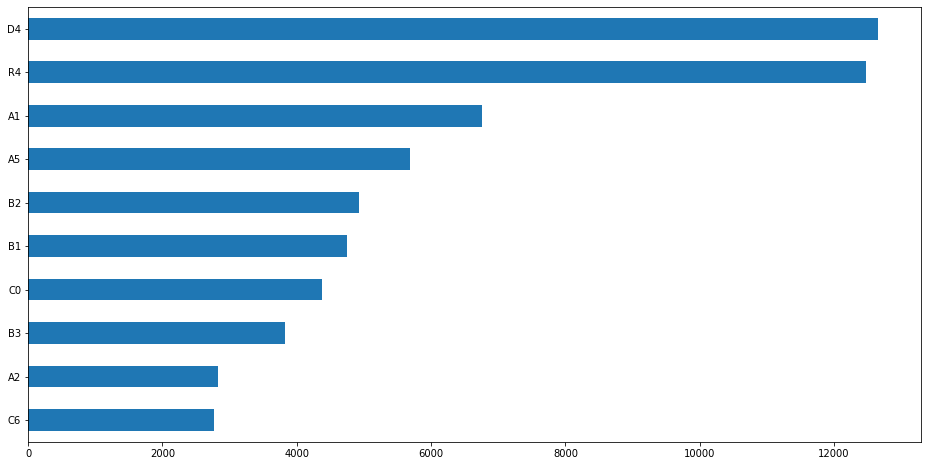

In [24]:
plt.figure(figsize=(16,8))
df['BUILDING CLASS AT PRESENT'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "BUILDING CLASS AT PRESENT" bersifat kategorikal.

In [25]:
print("Modus Dari kolom BUILDING CLASS AT PRESENT adalah",statistics.mode(df['BUILDING CLASS AT PRESENT']))

Modus Dari kolom BUILDING CLASS AT PRESENT adalah D4


#### RESIDENTIAL UNIT

kolom ini berisi data yang merepresentasikan jumlah unit yang bersifat residensial. Untuk kolom RESIDENTIAL UNITS, karena bersifat numerik, maka kita akan mencoba mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

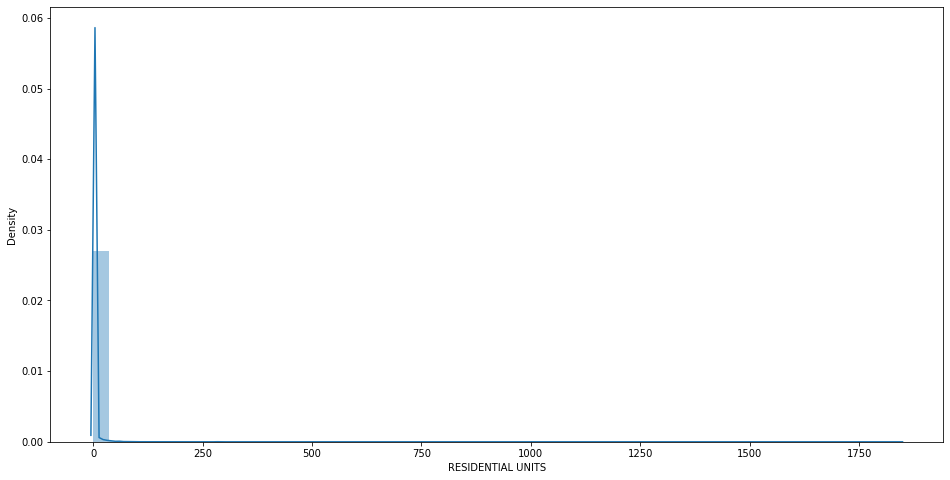

Rata Rata Dari RESIDENTIAL UNITS adalah : 2.0252637554998345
Median dari RESIDENTIAL UNITS adalah : 1.0
Standar Deviasi Dari RESIDENTIAL UNITS adalah : 16.720938129302155
Variance Dari RESIDENTIAL UNITS adalah : 279.5897719239507
Modus Dari RESIDENTIAL UNITS adalah : 1
Percentile 25,50, dan 75 Dari RESIDENTIAL UNITS adalah : [0. 1. 2.]


In [26]:
plt.figure(figsize=(16,8))
sns.distplot(df['RESIDENTIAL UNITS'])
plt.show()
print('Rata Rata Dari RESIDENTIAL UNITS adalah :',df['RESIDENTIAL UNITS'].mean())
print('Median dari RESIDENTIAL UNITS adalah :',df['RESIDENTIAL UNITS'].median())
print('Standar Deviasi Dari RESIDENTIAL UNITS adalah :',np.std(df['RESIDENTIAL UNITS']))
print('Variance Dari RESIDENTIAL UNITS adalah :',np.var(df['RESIDENTIAL UNITS']))
print('Modus Dari RESIDENTIAL UNITS adalah :',statistics.mode(df['RESIDENTIAL UNITS']))
print('Percentile 25,50, dan 75 Dari RESIDENTIAL UNITS adalah :',np.percentile(df['RESIDENTIAL UNITS'],[25,50,75]))

#### COMMERCIAL UNITS

kolom ini berisi data yang merepresentasikan jumlah unit yang bersifat komersial. Untuk kolom COMMERCIAL UNITS, karena bersifat numerik, maka kita akan mencoba mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

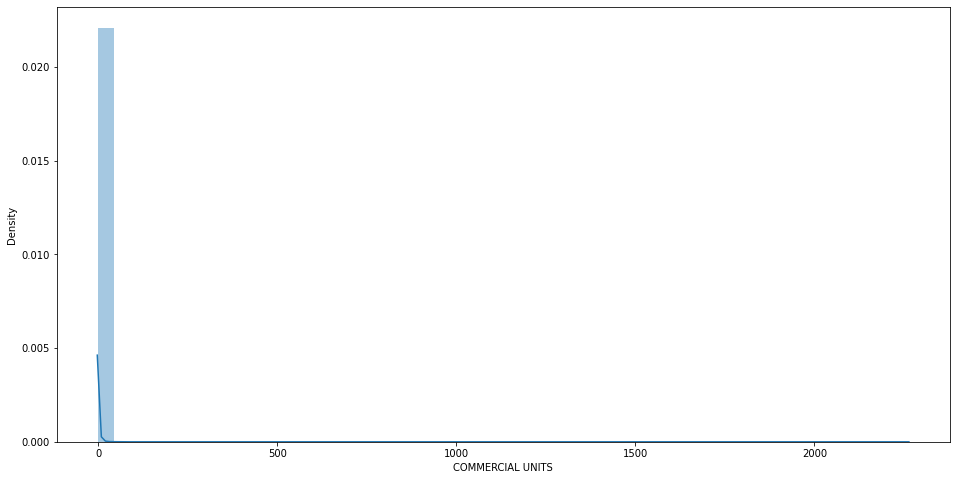

Rata Rata Dari COMMERCIAL UNITS adalah : 0.19355868855561337
Median dari COMMERCIAL UNITS adalah : 0.0
Standar Deviasi Dari COMMERCIAL UNITS adalah : 8.713131840069074
Variance Dari COMMERCIAL UNITS adalah : 75.9186664624255
Modus Dari COMMERCIAL UNITS adalah : 0
Percentile 25,50, dan 75 Dari COMMERCIAL UNITS adalah : [0. 0. 0.]


In [27]:
plt.figure(figsize=(16,8))
sns.distplot(df['COMMERCIAL UNITS'])
plt.show()
print('Rata Rata Dari COMMERCIAL UNITS adalah :',df['COMMERCIAL UNITS'].mean())
print('Median dari COMMERCIAL UNITS adalah :',df['COMMERCIAL UNITS'].median())
print('Standar Deviasi Dari COMMERCIAL UNITS adalah :',np.std(df['COMMERCIAL UNITS']))
print('Variance Dari COMMERCIAL UNITS adalah :',np.var(df['COMMERCIAL UNITS']))
print('Modus Dari COMMERCIAL UNITS adalah :',statistics.mode(df['COMMERCIAL UNITS']))
print('Percentile 25,50, dan 75 Dari COMMERCIAL UNITS adalah :',np.percentile(df['COMMERCIAL UNITS'],[25,50,75]))

#### TOTAL UNITS

kolom ini berisi data yang merepresentasikan TOTAL UNIT, baik unit yang bersifat komersial maupun residensial. Untuk kolom TOTAL UNITS, karena bersifat numerik, maka kita akan mencoba mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

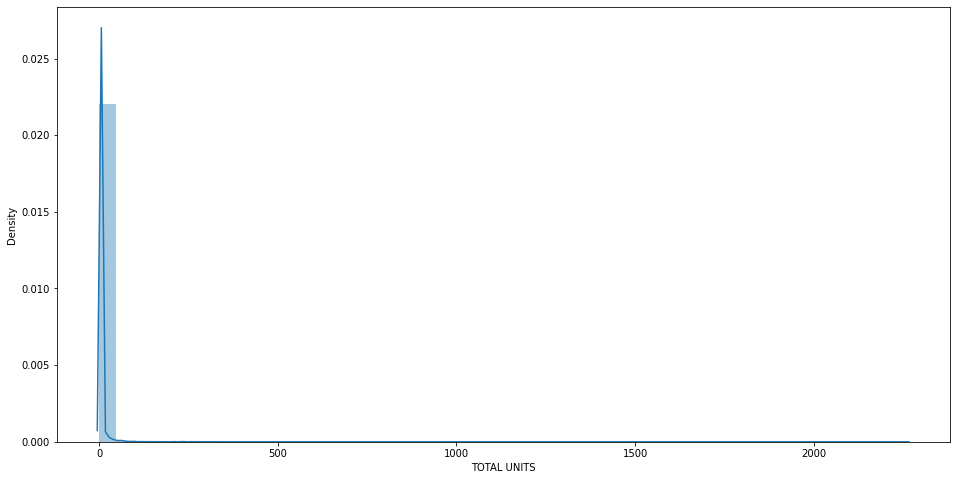

Rata Rata Dari TOTAL UNITS adalah : 2.249183895538629
Median dari TOTAL UNITS adalah : 1.0
Standar Deviasi Dari TOTAL UNITS adalah : 18.972472231613203
Variance Dari TOTAL UNITS adalah : 359.95470257933414
Modus Dari TOTAL UNITS adalah : 1
Percentile 25,50, dan 75 Dari TOTAL UNITS adalah : [1. 1. 2.]


In [28]:
plt.figure(figsize=(16,8))
sns.distplot(df['TOTAL UNITS'])
plt.show()
print('Rata Rata Dari TOTAL UNITS adalah :',df['TOTAL UNITS'].mean())
print('Median dari TOTAL UNITS adalah :',df['TOTAL UNITS'].median())
print('Standar Deviasi Dari TOTAL UNITS adalah :',np.std(df['TOTAL UNITS']))
print('Variance Dari TOTAL UNITS adalah :',np.var(df['TOTAL UNITS']))
print('Modus Dari TOTAL UNITS adalah :',statistics.mode(df['TOTAL UNITS']))
print('Percentile 25,50, dan 75 Dari TOTAL UNITS adalah :',np.percentile(df['TOTAL UNITS'],[25,50,75]))

#### LAND SQUARE FEET

kolom ini merepresentasikan luas bangunan dari segi LAND SQUARE FEET. Karena data ini bersifat numerik maka akan kita coba untuk mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

In [29]:
df['LAND SQUARE FEET'].value_counts()

 -       26252
0        10326
2000      3919
2500      3470
4000      3044
         ...  
5886         1
76712        1
6777         1
10833        1
10796        1
Name: LAND SQUARE FEET, Length: 6062, dtype: int64

Ternyata kolom ini terdapat missing value berupa tanda "-" yang perlu kita ubah. Maka dari itu kita akan mengubah tanda "-" menjadi 0 dengan tipe data float.

In [30]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].replace({' -  ':'0'})
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].astype(float)

Setelah itu, barulah kita cari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

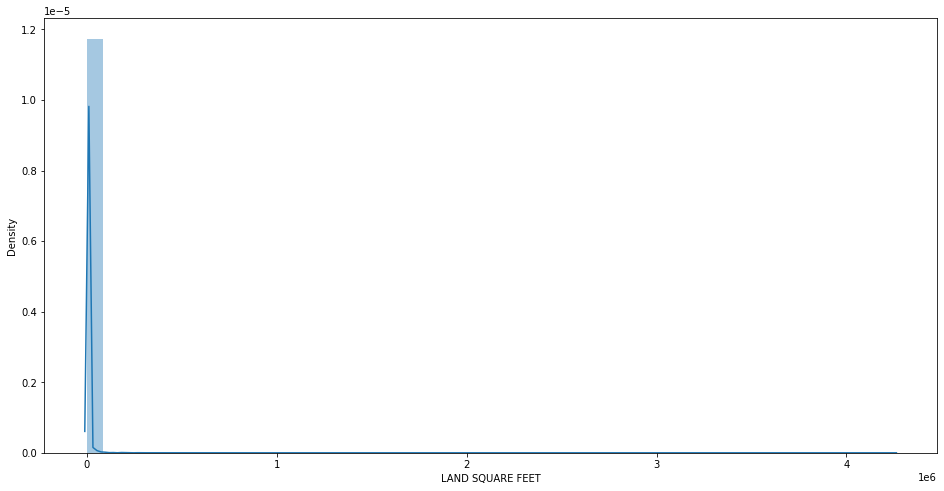

Rata Rata Dari LAND SQUARE FEET adalah : 2717.7926266736054
Median dari LAND SQUARE FEET adalah : 1770.0
Standar Deviasi Dari LAND SQUARE FEET adalah : 34909.2900452477
Variance Dari LAND SQUARE FEET adalah : 1218658531.46323
Modus Dari LAND SQUARE FEET adalah : 0.0
Percentile 25,50, dan 75 Dari LAND SQUARE FEET adalah : [   0. 1770. 2658.]


In [31]:
plt.figure(figsize=(16,8))
sns.distplot(df['LAND SQUARE FEET'])
plt.show()
print('Rata Rata Dari LAND SQUARE FEET adalah :',df['LAND SQUARE FEET'].mean())
print('Median dari LAND SQUARE FEET adalah :',df['LAND SQUARE FEET'].median())
print('Standar Deviasi Dari LAND SQUARE FEET adalah :',np.std(df['LAND SQUARE FEET']))
print('Variance Dari LAND SQUARE FEET adalah :',np.var(df['LAND SQUARE FEET']))
print('Modus Dari LAND SQUARE FEET adalah :',statistics.mode(df['LAND SQUARE FEET']))
print('Percentile 25,50, dan 75 Dari LAND SQUARE FEET adalah :',np.percentile(df['LAND SQUARE FEET'],[25,50,75]))

#### GROSS SQUARE FEET

kolom ini merepresentasikan luas bangunan dari segi GROSS SQUARE FEET. Karena data ini bersifat numerik maka akan kita coba untuk mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

In [32]:
df['GROSS SQUARE FEET'].value_counts()

 -       27612
0        11417
2400       386
1800       361
2000       359
         ...  
13740        1
12256        1
3823         1
7768         1
64117        1
Name: GROSS SQUARE FEET, Length: 5691, dtype: int64

Ternyata kolom ini terdapat missing value berupa tanda "-" yang perlu kita ubah. Maka dari itu kita akan mengubah tanda "-" menjadi 0 dengan tipe data float.

In [33]:
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].replace({' -  ':'0'})
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].astype(float)

Setelah itu, barulah kita cari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

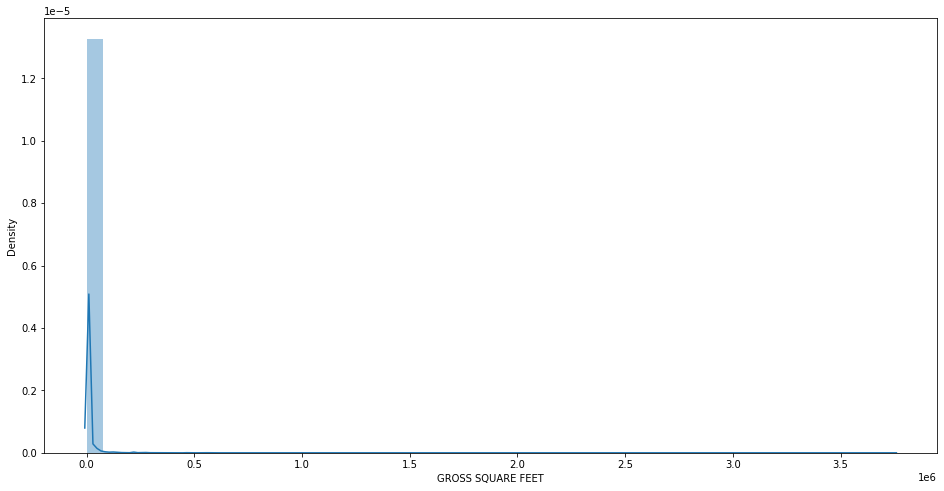

Rata Rata Dari GROSS SQUARE FEET adalah : 2724.4452973458865
Median dari GROSS SQUARE FEET adalah : 1076.0
Standar Deviasi Dari GROSS SQUARE FEET adalah : 28810.63042361015
Variance Dari GROSS SQUARE FEET adalah : 830052425.4058508
Modus Dari GROSS SQUARE FEET adalah : 0.0
Percentile 25,50, dan 75 Dari GROSS SQUARE FEET adalah : [   0. 1076. 2080.]


In [34]:
plt.figure(figsize=(16,8))
sns.distplot(df['GROSS SQUARE FEET'])
plt.show()
print('Rata Rata Dari GROSS SQUARE FEET adalah :',df['GROSS SQUARE FEET'].mean())
print('Median dari GROSS SQUARE FEET adalah :',df['GROSS SQUARE FEET'].median())
print('Standar Deviasi Dari GROSS SQUARE FEET adalah :',np.std(df['GROSS SQUARE FEET']))
print('Variance Dari GROSS SQUARE FEET adalah :',np.var(df['GROSS SQUARE FEET']))
print('Modus Dari GROSS SQUARE FEET adalah :',statistics.mode(df['GROSS SQUARE FEET']))
print('Percentile 25,50, dan 75 Dari GROSS SQUARE FEET adalah :',np.percentile(df['GROSS SQUARE FEET'],[25,50,75]))

#### YEAR BUILT

Kolom ini merepresentasikan tahun berapa bangunan dibuat, karena data ini tidak bersifat nominal, sehingga kita hanya perlu mencari modusnya saja. Sebelum itu kita bisa melihat frekuensi kemunculan nilainya. Rumah di tahun berapa yang paling banyak dijual?

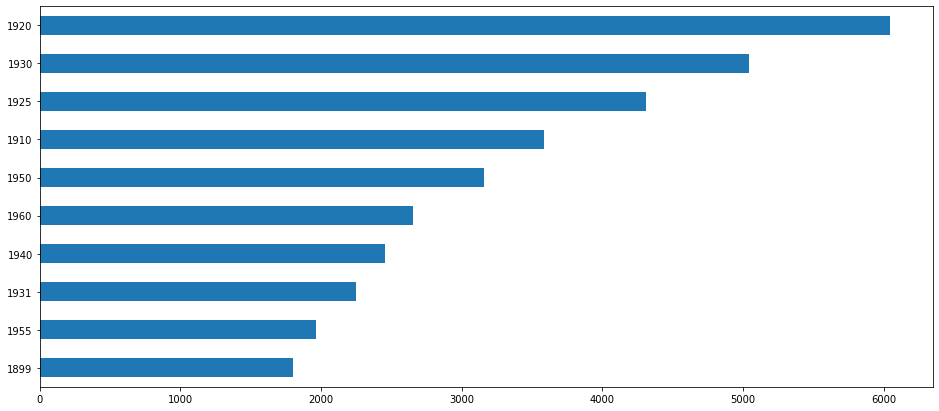

In [35]:
plt.figure(figsize=(16,7))
df[df['YEAR BUILT']!=0]['YEAR BUILT'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

In [36]:
print("Modus atau Tahun berdirinya rumah yang paling banyak terjual adalah rumah yang dibuat tahun",statistics.mode(df[df['YEAR BUILT']!=0]['YEAR BUILT']))

Modus atau Tahun berdirinya rumah yang paling banyak terjual adalah rumah yang dibuat tahun 1920


#### TAX CLASS AT TIME OF SALE

Kolom ini merepresentasikan kelas pajak dari properti pada masa saat properti itu dijual. Data ini juga bersifat kategorikal sehingga kita akan mencoba melihat frekuensi kemunculan nilainya.

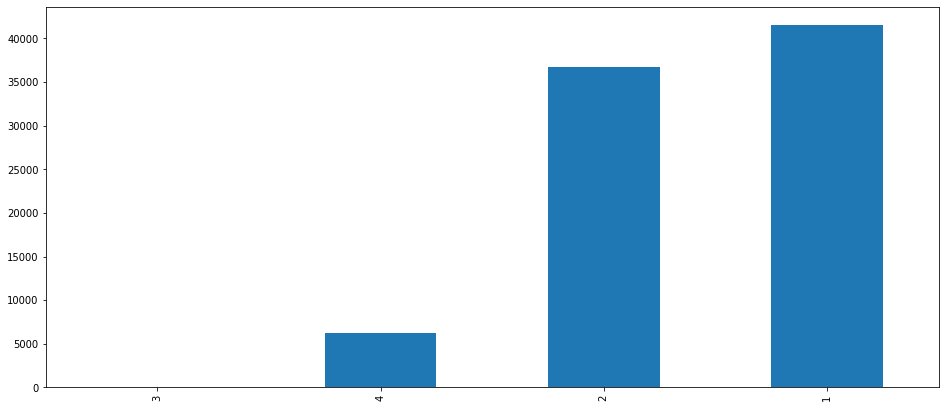

In [37]:
plt.figure(figsize=(16,7))
df['TAX CLASS AT TIME OF SALE'].value_counts().sort_values().tail(10).plot(kind='bar')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "TAX CLASS AT TIME OF SALE" bersifat kategorikal.

In [38]:
print("Modus =",statistics.mode(df['TAX CLASS AT TIME OF SALE']))

Modus = 1


Ternyata, pajak bangunan saat bangunan dijual paling banyak pada kelas 1.

#### BUILDING CLASS AT TIME OF SALE

Kolom ini merepresentasikan kelas bangunan yang dijual saat bangunan dijual.Data ini juga bersifat kategorikal sehingga kita akan mencoba melihat frekuensi kemunculan nilainya.

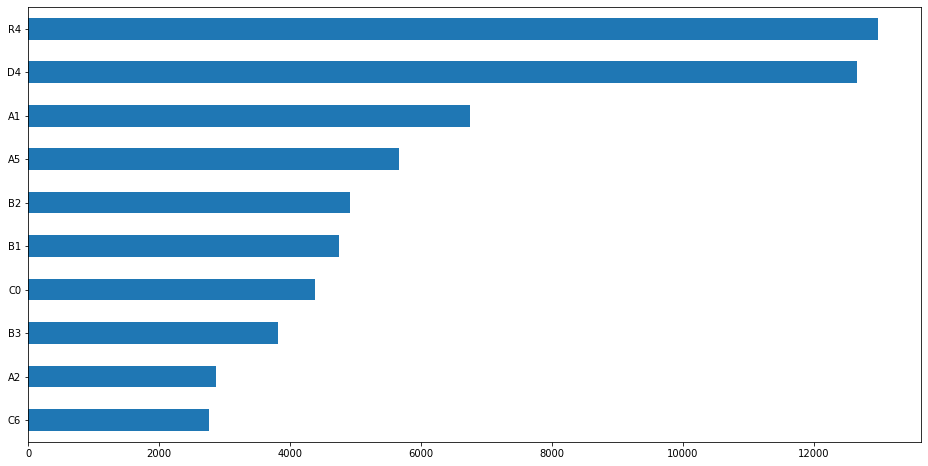

In [39]:
plt.figure(figsize=(16,8))
df['BUILDING CLASS AT TIME OF SALE'].value_counts().sort_values().tail(10).plot(kind='barh')
plt.show()

Setelah hasil terlihat, data statistik deskriptif yang bisa kita tarik adalah data modus, karena data "BUILDING CLASS AT TIME OF SALE" bersifat kategorikal.

In [40]:
print("Modus =",statistics.mode(df['BUILDING CLASS AT TIME OF SALE']))

Modus = R4


Ternyata kelas bangunan yang paling banyak dijual saat itu adalah kelas R4.

#### SALE PRICE

Kolom ini merepresentasikan harga jual dari properti yang diperjual belikan. Terdapat beberapa bangunan yang dipindah tangankan seperti dari orangtua ke anak dans sejenisnya sehingga pada data ini dilabeli sebagai $0. Karena data ini bersifat numerik maka akan kita coba untuk mencari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

In [41]:
df['SALE PRICE'].value_counts()

 -         14561
0          10228
10           766
450000       427
550000       416
           ...  
191100         1
1542499        1
782990         1
2784765        1
69300          1
Name: SALE PRICE, Length: 10008, dtype: int64

Ternyata kolom ini terdapat missing value berupa tanda "-" yang perlu kita ubah. Maka dari itu kita akan mengubah tanda "-" menjadi 0 dengan tipe data float.

In [42]:
df['SALE PRICE'] = df['SALE PRICE'].replace({' -  ':'0'})
df['SALE PRICE'] = df['SALE PRICE'].astype(float)

Setelah itu, barulah kita cari rata rata, median, modus, standar deviasi, varians, dan persentil masing masing pada 25,50, dan 75.

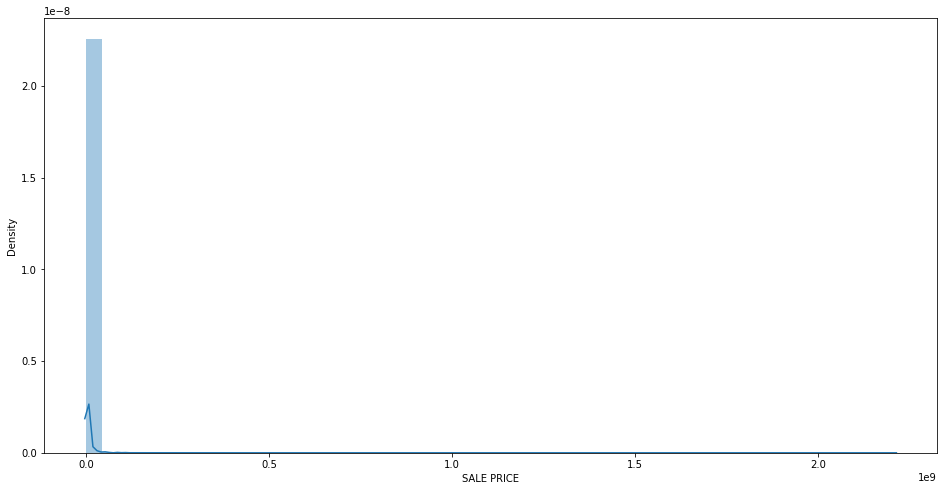

Rata Rata Dari SALE PRICE adalah : 1056622.9941453375
Median dari SALE PRICE adalah : 415000.0
Standar Deviasi Dari SALE PRICE adalah : 10387878.500448214
Variance Dari SALE PRICE adalah : 107908019740074.25
Modus Dari SALE PRICE adalah : 0.0
Percentile 25,50, dan 75 Dari SALE PRICE adalah : [     0. 415000. 830000.]


In [43]:
plt.figure(figsize=(16,8))
sns.distplot(df['SALE PRICE'])
plt.show()
print('Rata Rata Dari SALE PRICE adalah :',df['SALE PRICE'].mean())
print('Median dari SALE PRICE adalah :',df['SALE PRICE'].median())
print('Standar Deviasi Dari SALE PRICE adalah :',np.std(df['SALE PRICE']))
print('Variance Dari SALE PRICE adalah :',np.var(df['SALE PRICE']))
print('Modus Dari SALE PRICE adalah :',statistics.mode(df['SALE PRICE']))
print('Percentile 25,50, dan 75 Dari SALE PRICE adalah :',np.percentile(df['SALE PRICE'],[25,50,75]))

#### SALE DATE

data ini menggambarkan tanggal dan waktu saat transaksi jual beli properti dilakukan. Karena data ini bersifat time-series, sehingga kali ini kita akan melihat tren penjualan tiap bulannya saja. <br>
Karena formatnya masih dalam bentuk string Date legkap. Saya akan emngambil tahun dan bulannya saja untuk divisualisasaikan dengan cara looping dan dimasukkan ke sebuah list.

In [44]:
saledate =[]
for i in range(len(df['SALE DATE'])):
    saledate.append(df['SALE DATE'].loc[i][:7])

Setelah itu barulah divisualisasikan tren penjualan tiap bulannya dari tahun 2016 - 2017

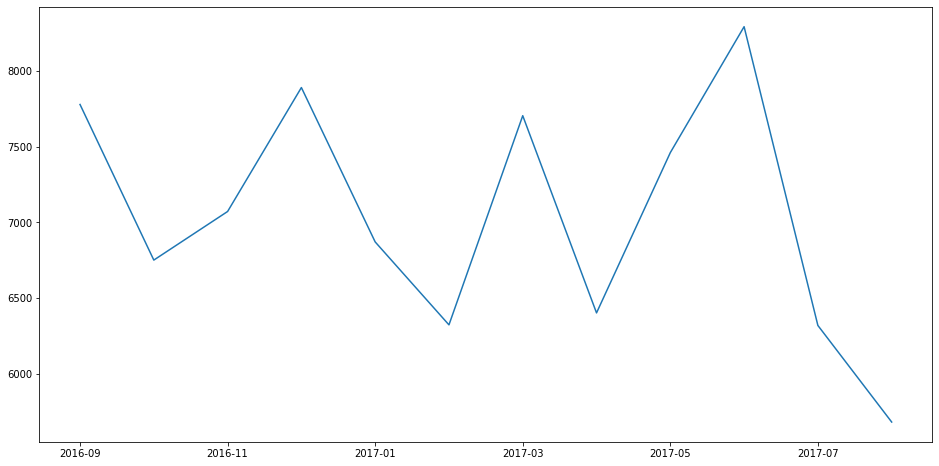

In [45]:
plt.figure(figsize=(16,8))
pd.Series(saledate).value_counts().sort_index().plot(kind='line')
plt.show()

Dapat kita lihat ternyata penjualan terbanyak terjadi di bulan juni tahun 2017.

Selannjutnya kita akan melakukan anailisi lebih dalam pada beberapa kolom yang menarik.

### Daerah mana yang paling banyak penjualannya?


untuk memulai menjawab pertanyaan tersebut, saya akan terlebih dulu mereplace data pada kolom wilayah agar dapat lebih jelas merepresentasikan  wilayahnya.

In [46]:
df['BOROUGH'] = df['BOROUGH'].astype(str)
df['BOROUGH'].replace({'1':'Manhattan','2':'Bronx','3':'Brooklyn','4':'Queens','5':'Staten Island'},inplace=True)

Lalu kita akan lihat wilayah dengan penjualan terbanyak.

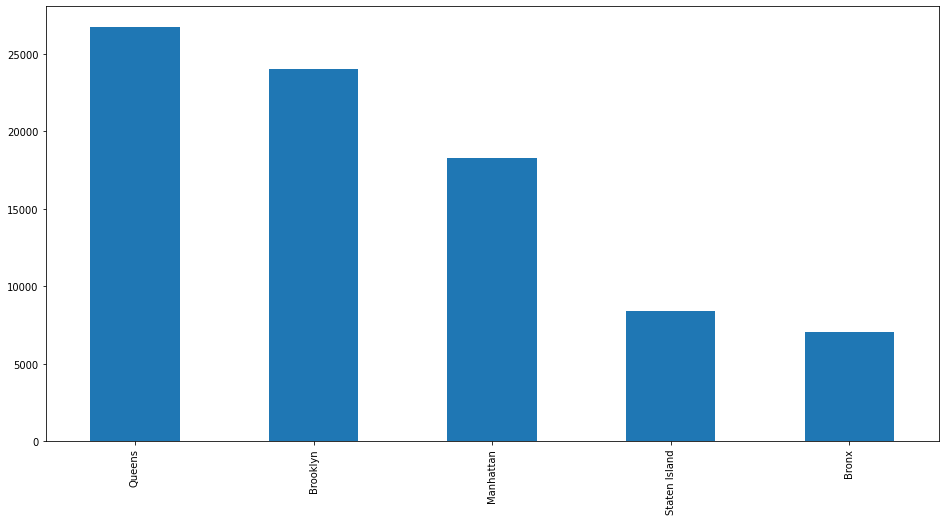

In [47]:
plt.figure(figsize=(16,8))
df['BOROUGH'].value_counts().plot(kind='bar')
plt.show()

In [48]:
df['BOROUGH'].value_counts().values[0]

26736

Ternyata wilayah dengan penjualan terbanyak terdapat pada daerah Queens dengan totla penjualan sebanayk 26.736 Transaksi.

### Apakah bangunan lama atau bangunan baru yang lebih terjual?

Sebelumnya saya akan memastikan data ini bersifat numerik dengan mengubah tipe data menjadi integer.

In [49]:
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)

lalu untuk pengkategorian akan saya buat sebagai berikut : <br>
Sangat Lama : <1900 <br>
Lama : 1900 - 1950 <br>
Cukup Baru : 1951 -2000 <br>
Baru: >2000 <br>

Lalu kita cari modus dari tahunnya. Dalam hal ini kita tidak akan menggunakan data tahun yang bernilai 0.

In [50]:
mode = statistics.mode(list(df[df['YEAR BUILT']>0]['YEAR BUILT']))
mode

1920

Lalu akan saya buatkan fungsi untuk menentukan termasuk kategori apa modus pada data tersebut. 

In [51]:
def modus(val):
    #"Fungsi ini mengembalikan Kategori Baru-Lama dari bangunan"
    if (val > 2000):
        msg = "Baru"
    elif val <= 2000 & val > 1950:
        msg = "Cukup Baru"
    elif val <=1950 & val >1900:
        msg = "Lama"
    elif val <=1900:
        msg = "Sangat Lama"
    return msg
    

In [52]:
print("Ternyata, Bangunan yang paling banyak ditransaksikan adalah bangunan dengan Kategori", modus(mode))

Ternyata, Bangunan yang paling banyak ditransaksikan adalah bangunan dengan Kategori Lama


### Bagaimana Rata rata penjualan per properti? Properti apakah yang biasa dijual paling mahal?

Untuk mengetahuinya, kita bisa langsung melakukan grouping pada data sale dengan grouping menggunakan kolom building class category, lalu di agregat dengan fungsi rata rata. Setelah itu kita tinggal mengurutkan dari yang terbesar kemudian divisualisasikan.

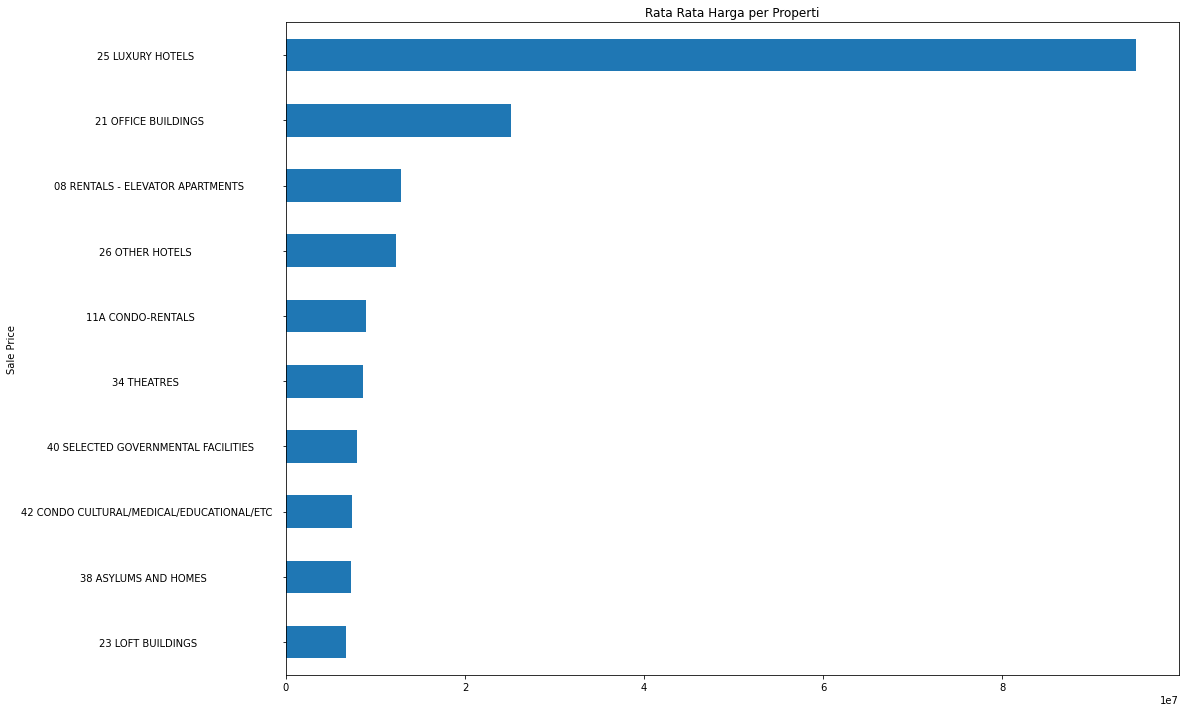

In [53]:
plt.figure(figsize=(16,12))
df['SALE PRICE'].groupby(df['BUILDING CLASS CATEGORY']).mean().sort_values().tail(10).plot.barh()

plt.ylabel("Sale Price")
plt.title('Rata Rata Harga per Properti');

Ternyata properti dengan rata rata harga jual termahal adalah jenis **Luxury Hotel**. Lalu untuk mengetahui angka pasti dari rata rata tersebut akan coba kita cari denggan mengambil nilai dari fungsi aggregat sebelumnya.

In [54]:
exp_cat = df['SALE PRICE'].groupby(df['BUILDING CLASS CATEGORY']).mean().sort_values().tail(1).index[0]

In [55]:
df[df['BUILDING CLASS CATEGORY']==exp_cat]['SALE PRICE'].mean()

94918350.0

Ternyata, rata rata harga penjualan Luxury Hotel berada di angka $94.918.350 Menurut data tersebut.

### Bagaimana Median harga di tiap daerah?

Selanjutnya kita ingin tahu median harga di tiap daerahnya. Caranya adlah dengan menyiapkan terlebih dahulu data harga pada tiap daerah dengan melakukan slicing berdasarkan kondisi tertentu, yaitu dengan menentukan daerah apa saja. Kemudian datanya kita simpan dalam satu variable list.

In [56]:
manh = list(df[df['BOROUGH']=='Manhattan']['SALE PRICE'])
bronx = list(df[df['BOROUGH']=='Bronx']['SALE PRICE'])
brook = list(df[df['BOROUGH']=='Brooklyn']['SALE PRICE'])
queens = list(df[df['BOROUGH']=='Queens']['SALE PRICE'])
statIsl = list(df[df['BOROUGH']=='Staten Island']['SALE PRICE'])

Setelah data di data, kita akan coba memvisualisasikannya dengan menggunakna boxplot.

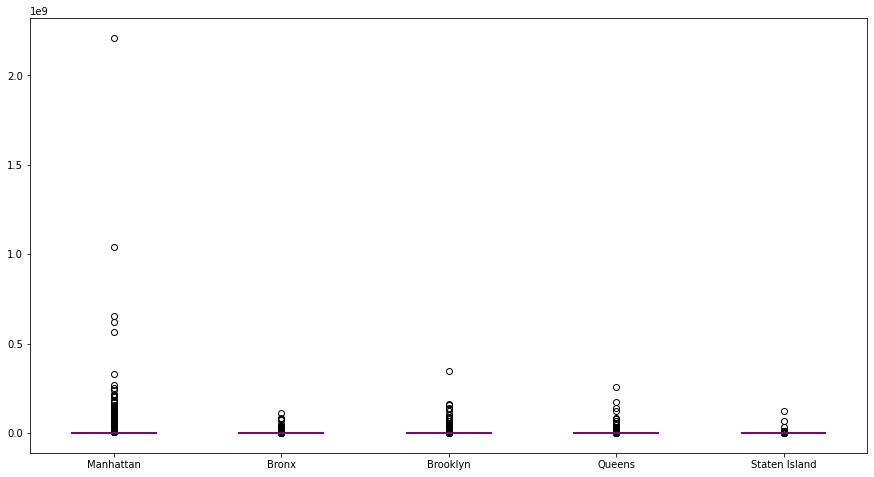

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
ax.boxplot((manh, bronx, brook,queens,statIsl), vert=True, showmeans=False, meanline=False,
           labels=('Manhattan','Bronx','Brooklyn','Queens','Staten Island'), patch_artist=True,
           medianprops={'linewidth': 2, 'color': 'purple'})
plt.show()

Ternyata banyak outliers berupa properti dengan harga malah, sehingga kita akan coba mengetahuinya dengan menggunakan built-in emthod yang sudah disediakan oleh pandas.

In [58]:
df['SALE PRICE'].groupby(df['BOROUGH']).median()

BOROUGH
Bronx            270000.0
Brooklyn         420000.0
Manhattan        835500.0
Queens           305000.0
Staten Island    355000.0
Name: SALE PRICE, dtype: float64

Selain mediannya, kita ternyata bisa melihat properti dengan harga tertinggi yang ada di Manhattan.

In [61]:
max_man = df[df['BOROUGH']=='Manhattan']['SALE PRICE'].max()
max_man

2210000000.0

Ternyata properti tersebut di transaksikan seharga $2.210.000.000

In [63]:
print("atau sekitar",(max_man/df['SALE PRICE'].groupby(df['BOROUGH']).median()[2])*100,"% dari median harga di kota Manhattan")

atau sekitar 264512.2681029324 % dari median harga di kota Manhattan


Mari kita coba telusuri lebih dalam bangunan apa yang dijual dengan harga fantastis tersebut.

In [64]:
df[(df['BOROUGH']=='Manhattan') & (df['SALE PRICE']==max_man)]

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
7447,Manhattan,MIDTOWN CBD,21 OFFICE BUILDINGS,4,1301,1,O4,245 PARK AVENUE,,10167,0,35,35,81336.0,1586886.0,1966,4,O4,2.210000e+09,2017-05-05 00:00:00


### Bagaimana Standar Deviasi  dan Varians nya?

Untuk mengetahui STD dan VAR dari masing masing wilayah, terlebih dahulu kita slicing berdasarkan wilayah, kemudian dimasukkan ke dalam sebuah list. Karena tujuan saya adalah menampilkannya dalam bentuk DataFrame.

In [65]:
# mencari varians
var = [df[df['BOROUGH']=='Manhattan']['SALE PRICE'].var(),df[df['BOROUGH']=='Bronx']['SALE PRICE'].var(), 
       df[df['BOROUGH']=='Brooklyn']['SALE PRICE'].var(), df[df['BOROUGH']=='Queens']['SALE PRICE'].var(),
       df[df['BOROUGH']=='Staten Island']['SALE PRICE'].var()]
# mencari STD
std = [df[df['BOROUGH']=='Manhattan']['SALE PRICE'].std(),df[df['BOROUGH']=='Bronx']['SALE PRICE'].std(), 
       df[df['BOROUGH']=='Brooklyn']['SALE PRICE'].std(), df[df['BOROUGH']=='Queens']['SALE PRICE'].std(),
       df[df['BOROUGH']=='Staten Island']['SALE PRICE'].std()]
# Menyiapkan nama wilayah
bor = ['Manhattan','Bronx','Brooklyn','Queens','Staten Island']

Selanjutnya, kita tinggal memvisualisasikannya dalam ebntuk dataframe dengan mbantuan library pandas.

In [66]:
table1 = pd.DataFrame({'Wilayah':bor, 'Standar Deviasi':std,'Varians':var})
table1

,Wilayah,Standar Deviasi,Varians
0,Manhattan,2.144490e+07,4.598839e+14
1,Bronx,2.783058e+06,7.745411e+12
2,Brooklyn,3.935813e+06,1.549063e+13
3,Queens,2.707468e+06,7.330385e+12
4,Staten Island,1.626386e+06,2.645130e+12


### Apakah data Luas Bangunanan berdistribusi Normal? (Shapiro-Wilk Test)

Untuk mengetahuinya, terlebih dahulu kita akan melakukan sebuah test bernama "SHAPIRO-WILK TEST" yang tujuannya adalah untuk menguji apakah suatu data berdistribusi normal atau tidak. <br>
Pertama tama kita akan memilih data luas bangunan (Gross Square Feet) yang tidak bernilai 0.

In [67]:
gross = df[df['GROSS SQUARE FEET']!= 0]['GROSS SQUARE FEET']

Setelah itu kita tinggal melakukan pengujian menggunakan bantuan library Scipy untuk mencari nilai p atau p value nya. dengan hipotesis.<br>
h0 = Data berdistribusi normal <br>
h1 = Data tidak berdistribusi normal <br>
alpha = 0.05

In [68]:

from scipy.stats import shapiro
stat, p = shapiro(gross)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Normal Dist')
else:
    print('Probably not Normal Dist')

stat=0.051, p=0.000
Probably not Normal Dist


ternyaata nilai p value tidak lebih besar dari 0.05 sehingga berdasarkan hipotesis maka data tidak berdistribusi normal.

### Berapa Confidence Interval untuk rata rata Luas bangunan di NYC?

untuk mencari rentang Confidence Interval, pertama tama kita harus memastikan datanya berdistribsui normal.

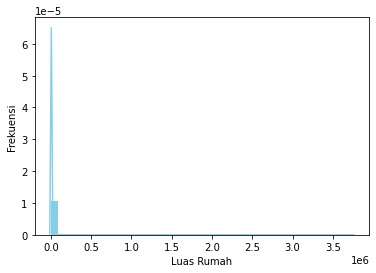

In [69]:
#Distribusi
ax = sns.distplot(gross,
                  bins=40,
                  kde=True,
                  color='skyblue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Luas Rumah', ylabel='Frekuensi')
plt.show()

Ternyata setelah divisualkan, data GSF tidak berbentuk distribusi normal, sehingga kita tidak bisa langsung menentukan Confidence Intervalnya. <br>
Untuk mengakalinya, kita bisa melakukan mean random sampling berdasarkan teori "Central Limit  Theory".

Dalam hal ini kita akan mengambil 300 sampel dengan masing masing sampel berisi 35 data random. Kemudian untuk rata ratanya, karena data luas rumah memiliki outlier yang cukup besar, maka akan digunakna Harmonic Mean.

In [89]:
sample_means = []
n = 35
for sample in range(0, 300):
    sample_values = np.random.choice(a=gross, size=n)    
    sample_mean = statistics.harmonic_mean(sample_values)
    sample_means.append(sample_mean)

Sehingga didaptkan hasil berupa rata rata sampel dari sampel_mean dengan distribusi seperdi berikut:

Text(0, 0.5, 'Frekuensi')

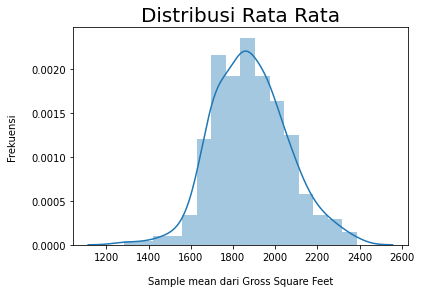

In [90]:
sns.distplot(sample_means)
plt.title("Distribusi Rata Rata", fontsize=20)
plt.xlabel("Sample mean dari Gross Square Feet", labelpad=14)
plt.ylabel("Frekuensi", labelpad=14)

Karena data sudah berdistribusi normal, sekarang kita bisa mencari nilai Confidence Interval dari data Gross Square Feet.

In [91]:
# standar deviasi sampel
std_sample = np.std(sample_means)
# rata rata dari sample_mean
avg_sample = np.mean(sample_means)
# panjang sample
n = len(sample_means)
# nilai z-core untuk CI 95%
z_sc = 1.96
# standar eror
se = std_sample/np.sqrt(n)

Yang kemudian dikalkulasikan nilai minimun CI dan maksimum CI nya

In [92]:
minCI = avg_sample - z_sc*se
maxCI = avg_sample + z_sc*se
print("CI min : ",minCI)
print("CI max : ",maxCI)

CI min :  1862.249648003144
CI max :  1901.8690670293022


Sehingga didapat hasil bahwa Rata Rata Harmonic dari Gross Square Feet dengan Confidence Interval 95% berada di interval **1862.25** - **1901.87**.

#### KESIMPULAN

Berdasarkan analisis deskriptif dan inferensial yang telah dilakukan, dapat saya tarik kesimpulan bahwa data transaksi penjualan properti ini sangatlah variatif, rata rata skewness kolom bernilai positif karena data banyak terkonsentrasi di harga dan luas yang tertentu tetapi terdapat data properti yang bersifat mewah dan besar sehingga menjadi ouliers bagi rata rata data yang ada. <br>
Meski demikian, masih banyak hal yang bisa dianalisis pada data tersebut. Penulis berharap dapat mengeksplorais lebih jauh data penjualan properti di NYC ini pada kesempatan lainnya.

#### TERIMA KASIH